In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [67]:
data = pd.read_csv('data/final_data.csv')

In [68]:
data

,Unnamed: 0,0.625 MHz,1.25 MHz,1.875 MHz,2.5 MHz,3.125 MHz,3.75 MHz,4.375 MHz,5 MHz,5.625 MHz,6.25 MHz
0,0,6912,-9984,-5888,11264,-10496,-4096,-15360,7680,1536,12800
1,1,14080,-15360,-12544,-2304,10496,-5888,7936,15360,10240,12800
2,2,16128,512,13568,-7680,-10496,13312,10496,2048,15104,12800
3,3,11776,15616,4096,14592,10496,-15872,-14592,-14080,14080,12800
4,4,3072,8960,-16128,-15872,-10496,12288,-1536,-10752,7680,12800
...,...,...,...,...,...,...,...,...,...,...,...
15995,15995,-12800,-15872,14592,14848,-11008,2048,15872,10240,15360,14848
15996,15996,-16128,-2304,-11008,-8448,11008,7680,-3584,-8192,11008,14848
15997,15997,-13312,14592,-7936,-1280,-11008,-14336,-13568,-15360,2304,14848
15998,15998,-5376,11264,15872,10496,11008,15616,12032,-1280,-7168,14848


In [69]:
divisor = 10
vs = 62.5 / divisor #Mhz
vos = data.columns[1:]
vpp = 1 # V
total_time = 1 / vs

# Part 5.2

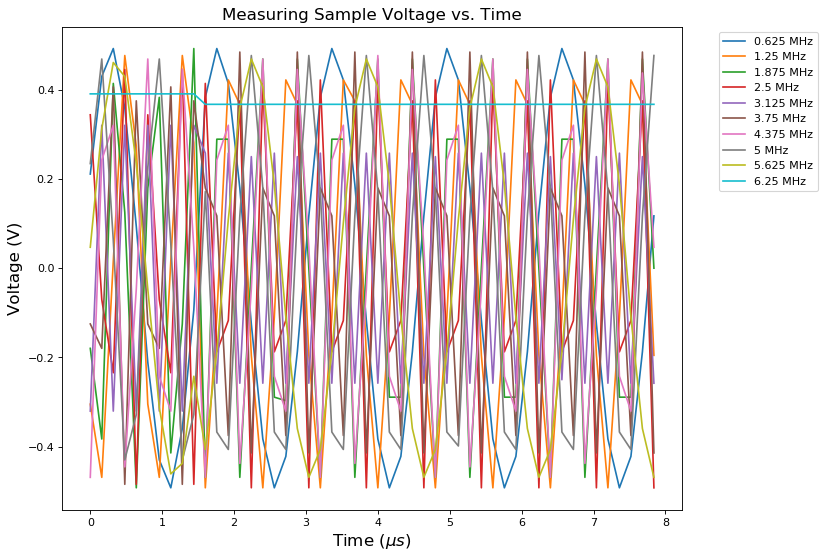

In [70]:
time = np.arange(0, 16000) * total_time
plt.figure(figsize=(10,8), dpi=80)
for vo in vos:
    v = data[vo][:50] / 2**15
    plt.plot(time[:50], v, label=vo)
# plt.xlim(0,25e-6)
plt.xlabel('Time $(\mu s)$', fontsize=15)
plt.ylabel('Voltage (V)', fontsize=15)
plt.title('Measuring Sample Voltage vs. Time', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

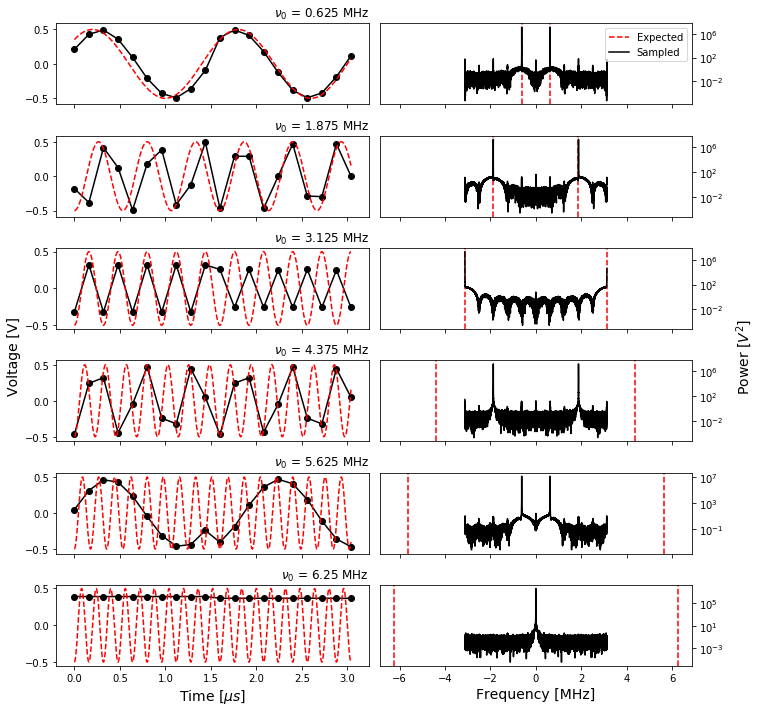

In [71]:
fig, ax = plt.subplots(6, 2, figsize=(10,10), sharex='col')
for i in range(0, len(vos), 2):
    vo = vos[i]
    # plot sinusoidal wave
    v = data[vo][:20] / 2**15
    ax[i//2,0].plot(time[:20], v, color="black")
    signal = float(vo.split(" ")[0])
    x = np.linspace(0, time[:20][-1], 1000)
    if i == 0:
        label1 = "Expected"
        label2 = "Sampled"
        phase = np.pi*3.5/2
    else:
        label1 = ''
        label2 = ''
        phase = np.pi
    ax[i//2,0].plot(x,0.5*np.cos(x*2*np.pi*signal + phase), 'r--',label=vo)
    ax[i//2,0].scatter(time[:20], v, color='black')
    ax[i//2,0].set_title('$\\nu_0$ = ' + vo, loc='right')
    
    # plot FFT power spectra
    power_fft = calc_power_fft(data[vo])
    ax[i//2,1].axvline(x=signal, color='red', ls='--', label=label1)
    ax[i//2,1].axvline(x=-signal, color='red', ls='--')
    freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
    ax[i//2,1].plot(freq, power_fft, color="black", label=label2)
    ax[i//2,1].set_yscale('log')
    ax[i//2,1].yaxis.tick_right()
    if label1 != '':
        ax[i//2,1].legend()

vo = vos[-1]
v = data[vo][:20] / 2**15
ax[5,0].plot(time[:20], v, color="black")
signal = float(vo.split(" ")[0])
x = np.linspace(0, time[:20][-1], 1000)
if i == 0:
    label1 = "Expected"
    label2 = "Sampled"
    phase = np.pi*3.5/2
else:
    label1 = ''
    label2 = ''
    phase = np.pi
ax[5,0].plot(x,0.5*np.cos(x*2*np.pi*signal + phase), 'r--',label=vo)
ax[5,0].scatter(time[:20], v, color='black')
ax[5,0].set_title('$\\nu_0$ = ' + vo, loc='right')

# plot FFT power spectra
power_fft = calc_power_fft(data[vo])
ax[5,1].axvline(x=signal, color='red', ls='--', label=label1)
ax[5,1].axvline(x=-signal, color='red', ls='--')
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
ax[5,1].plot(freq, power_fft, color="black", label=label2)
ax[5,1].set_yscale('log')
ax[5,1].yaxis.tick_right()
ax[5,0].set_xlabel('Time [$\mu s$]', fontsize=14)
ax[5,1].set_xlabel('Frequency [MHz]', fontsize=14)
fig.text(-0.01, 0.5, 'Voltage [V]', va='center', rotation='vertical', fontsize=14)
fig.text(1.0, 0.5, 'Power [$V^2$]', va='center', rotation='vertical', fontsize=14)

plt.tight_layout()
plt.show()
fig.savefig('samples.png')

# Part 5.3

In [72]:
def calc_power_fft(arr):
    fft = np.fft.fft(arr/2**15)
    shift_fft = np.fft.fftshift(fft)
    power_fft = np.abs(shift_fft) ** 2
    return power_fft

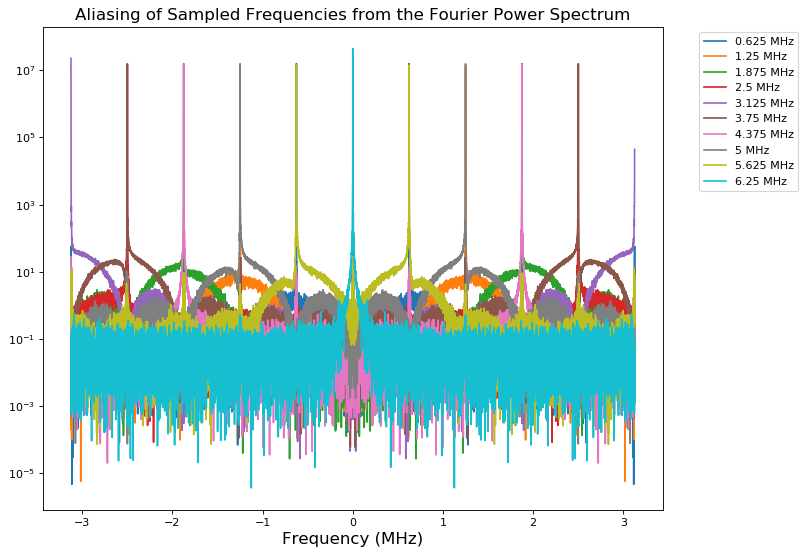

In [73]:
ffts = []
plt.figure(figsize=(10,8), dpi=80)
for vo in vos:
    power_fft = calc_power_fft(data[vo])
    fft = np.fft.fft(data[vo])
    freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
    ffts.append(fft)
    plt.plot(freq, power_fft, label=vo)

plt.xlabel('Frequency (MHz)', fontsize=15)
# plt.ylabel('Amplitude', fontsize=15)
plt.yscale('log')
plt.title('Aliasing of Sampled Frequencies from the Fourier Power Spectrum', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()
plt.show()

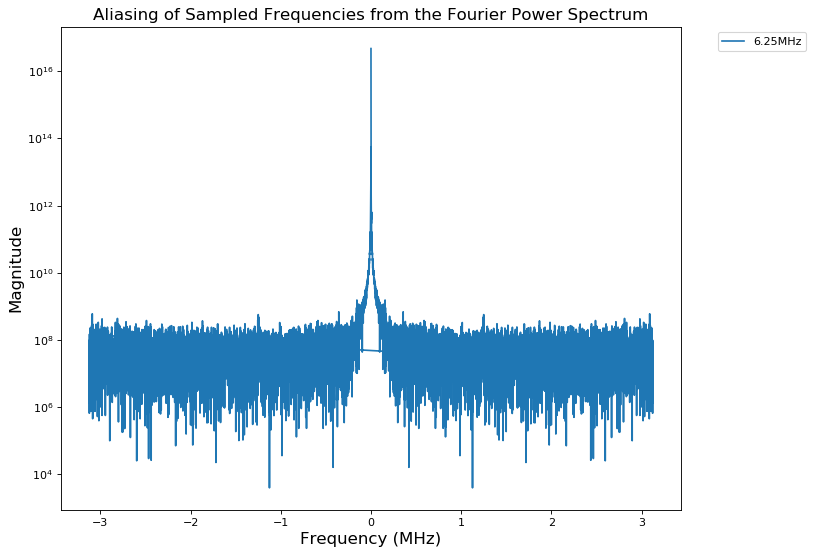

In [8]:
# ffts = []
plt.figure(figsize=(10,8), dpi=80)
# fig, ax = plt.subplots()
# for vo in vos:
fft = np.fft.fft(data['6.25 MHz'])
plot_fft = np.fft.fftshift(fft)
freq = np.fft.fftfreq(16000, d=1/vs)
# ffts.append(fft)
power_fft = np.abs(fft)**2
plt.plot(freq, power_fft, label='6.25MHz')
#     print(plot_fft)
# plt.xlim(0,0.0001)
plt.yscale('log')
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Magnitude', fontsize=15)
plt.title('Aliasing of Sampled Frequencies from the Fourier Power Spectrum', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()
plt.show()

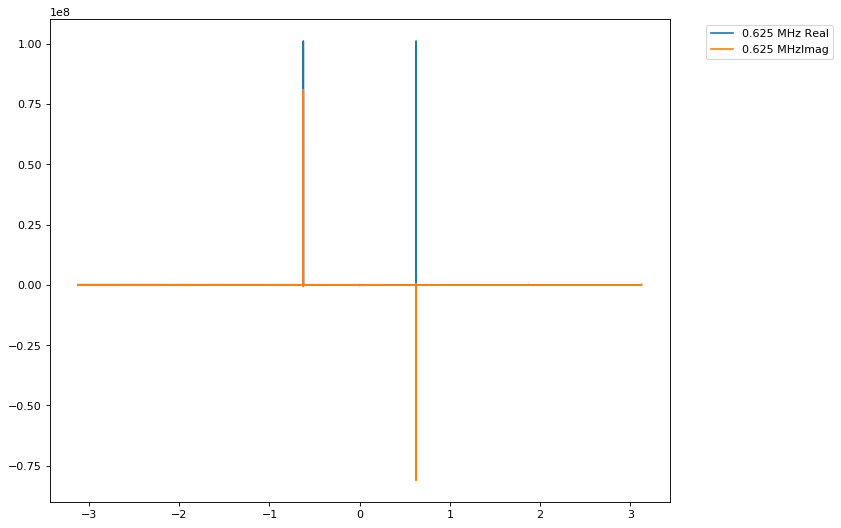

In [9]:
# for fft in ffts:
plt.figure(figsize=(10,8), dpi=80)
plt.plot(freq, ffts[0].real, label=vos[0] + ' Real')
plt.plot(freq, ffts[0].imag, label=vos[0] + 'Imag')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

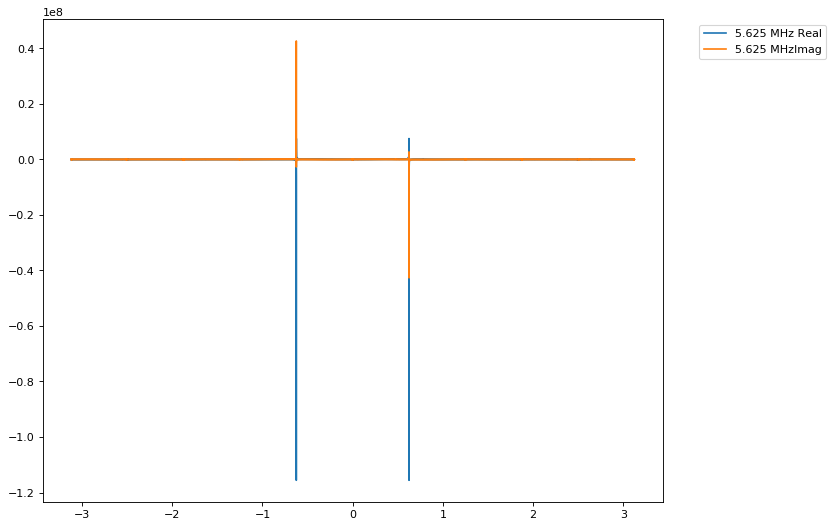

In [10]:
# for fft in ffts:
plt.figure(figsize=(10,8), dpi=80)
plt.plot(freq, ffts[-2].real, label=vos[-2] + ' Real')
plt.plot(freq, ffts[-2].imag, label=vos[-2] + 'Imag')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [127]:
nu_s_realizations_1 = np.load('data/0.1_nu_s_realizations.npy')
nu_s_realizations_8 = np.load('data/0.8_nu_s_realizations.npy')
print(nu_s_realizations_1.shape)

(5, 16000)


In [12]:
blocks_2 = np.load('data/blocks_2.npy')
blocks_4 = np.load('data/blocks_4.npy')
blocks_16 = np.load('data/blocks_16.npy')
blocks_8 = np.load('data/blocks_8.npy')
print(blocks_8.shape)

(1, 8, 16000)


Text(0.43, 0.0, 'Frequency [MHz]')

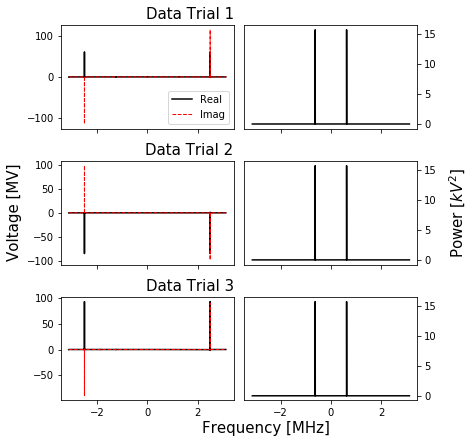

In [182]:
fig, ax = plt.subplots(3, 2,figsize=(6,6), sharex='col')

for i in range(3):
    freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
#     ax[i,0].set_yscale('log')
#     ax[i,1].set_yscale('log')
    fft = np.fft.fft(nu_s_realizations_1[i][:])
    ax[i,0].plot(freq, fft.real/1e6, 'black',label='Real', lw=1.5)
    ax[i,0].plot(freq, fft.imag/1e6, 'r--', label='Imag', lw=1.)
#     ax[0].legend(bbox_to_anchor=(1.02, 1.0), loc='upper left')
    ax[i,0].set_title('Data Trial ' + str(i+1), fontsize=15, loc='right')
    power_fft = calc_power_fft(nu_s_realizations_1[i][:])
    ax[i,1].plot(freq, power_fft/1e6, color='black')
    ax[i,1].yaxis.tick_right()

    
#     ax[1].set_yscale('log')
#     ax[1].set_xlabel("Frequency [MHz]", fontsize=15)
#     ax[1].legend(bbox_to_anchor=(1.02, 1.0), loc='upper left')
# ax[0,0].set_title("Voltage Spectra", fontsize=15)
# ax[0,1].set_title("Power Spectra", fontsize=15)
plt.tight_layout()
ax[0,0].legend(loc='lower right')
fig.text(-0.02, 0.5, 'Voltage [MV]', va='center', rotation='vertical', fontsize=15)
fig.text(1, 0.5, 'Power [$kV^2$]', va='center', rotation='vertical', fontsize=15)
fig.text(0.43, 0.0, 'Frequency [MHz]', va='center', fontsize=15)

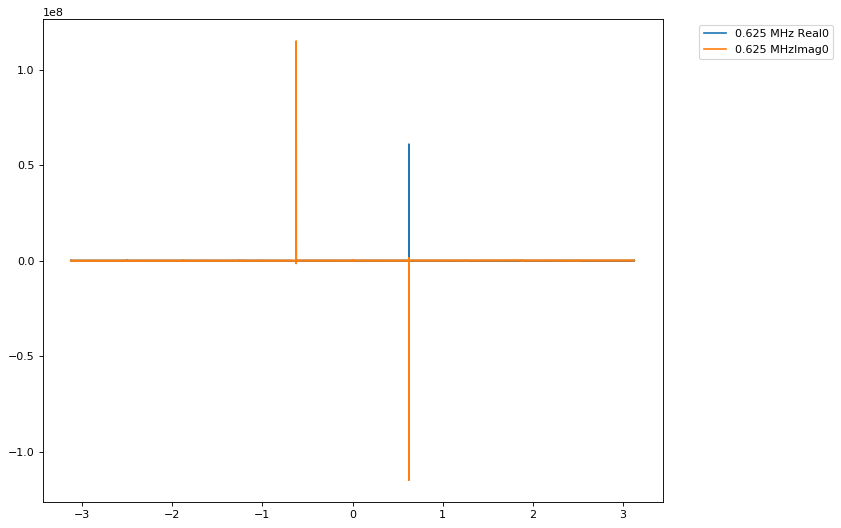

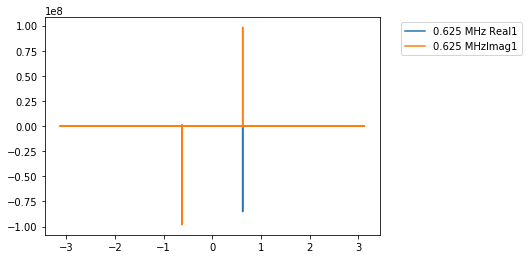

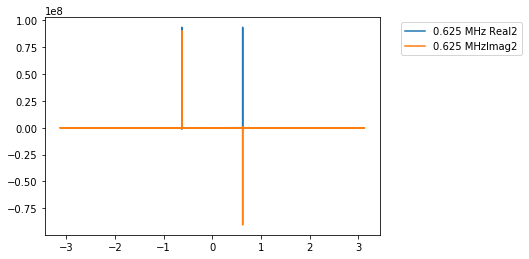

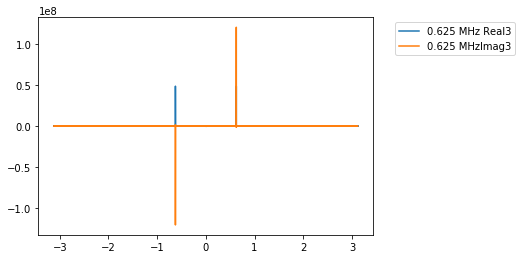

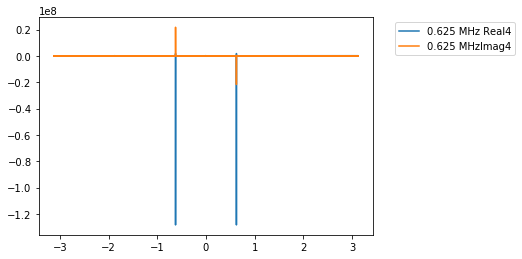

In [13]:
plt.figure(figsize=(10,8), dpi=80)
for i in range(nu_s_realizations_1.shape[0]):
    # for fft in ffts:
    # for i in range(0,len(vos)//2,2):
    fft = np.fft.fft(nu_s_realizations_1[i][:])
    plt.plot(freq, fft.real, label='0.625 MHz' + ' Real' + str(i))
    plt.plot(freq, fft.imag, label='0.625 MHz' + 'Imag' + str(i))
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

# Part 5.4

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


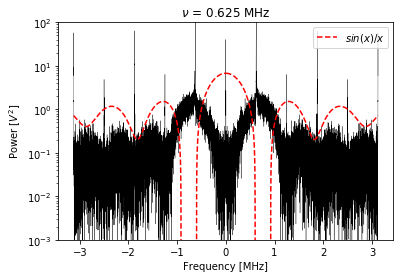

In [126]:
# spectral leakage plot sinc function over power spectra of spectral leakage
ref = data['0.625 MHz']
ref_power_fft = calc_power_fft(ref)
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
plt.plot(freq, ref_power_fft, color='black', lw=0.3)
plt.plot(freq, np.sin(6*freq)/(freq) + .75, "r--", label="$sin(x)/x$")
plt.yscale('log')
plt.ylim(.001, 100)
plt.xlabel("Frequency [MHz]")
plt.ylabel("Power [$V^2$]")
plt.title("$\\nu$ = 0.625 MHz")
plt.legend()
plt.savefig("leakage.png")

# plt.xlim(-1,2)

In [ ]:
# prove correlation theorem by correlation same as multiplying in FFT and then can plot sinc function over this


# Part 5.5 Frequency Resolution

In [170]:
window_1 = np.load('data/nyquist_window_1.npy')
window_2 = np.load('data/nyquist_window_2.npy')
window_3 = np.load('data/nyquist_window_3.npy')
window_4 = np.load('data/nyquist_window_4.npy')
window_5 = np.load('data/nyquist_window_5.npy')
window_6 = np.load('data/nyquist_window_6.npy')
window_2_5 = np.load('data/nyquist_window_2_5.npy')
window_3_5 = np.load('data/nyquist_window_3_5.npy')

tenth = np.load('data/tenth.npy')
hundredth = np.load('data/hundredth.npy')
thousandth = np.load('data/thousandth.npy')


(1, 1, 16000)


ValueError: x and y can be no greater than 2-D, but have shapes (1,) and (1, 1, 16000)

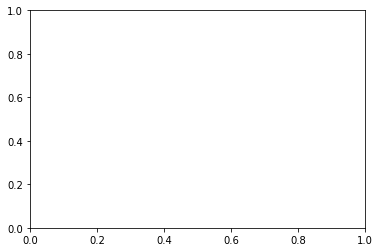

In [172]:

ref = tenth
plt.plot(ref)

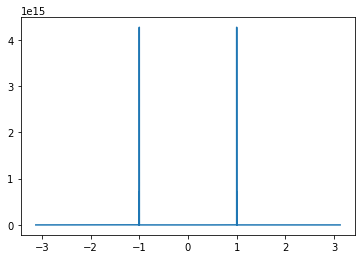

In [41]:
fft = np.fft.fft(hundredth[0][0][:])
shift_fft = np.fft.fftshift(fft)
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
power_fft = np.abs(shift_fft) ** 2
plt.plot(freq, power_fft)

# Part 5.6 Nyquist Windows

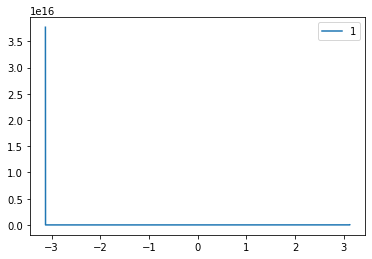

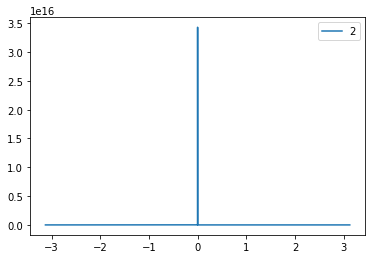

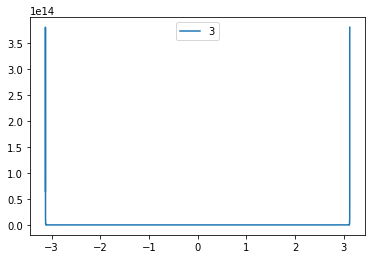

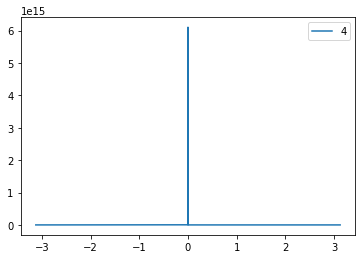

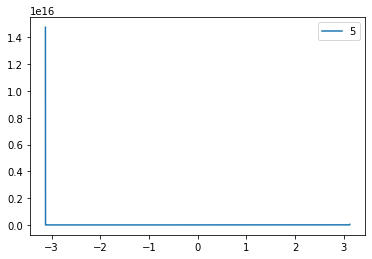

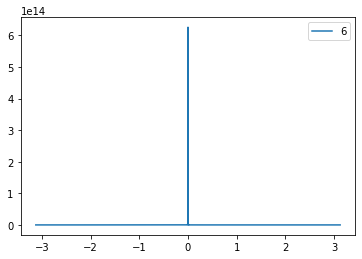

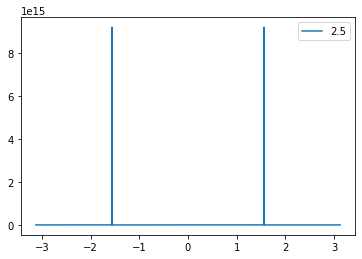

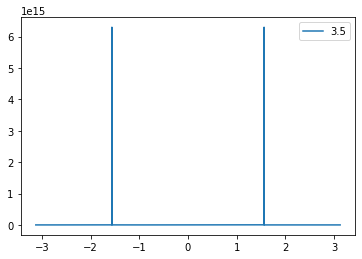

In [56]:
windows = [window_1, window_2, window_3, window_4, window_5, window_6, window_2_5, window_3_5]
labels = ['1', '2', '3', '4', '5', '6', '2.5', '3.5']

for i in range(len(windows)):
    data = windows[i]
    fft = np.fft.fft(data[0][0][:])
    shift_fft = np.fft.fftshift(fft)
    freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
    power_fft = np.abs(shift_fft) ** 2
    plt.plot(freq, power_fft, label=labels[i])
    plt.legend()
    plt.show()

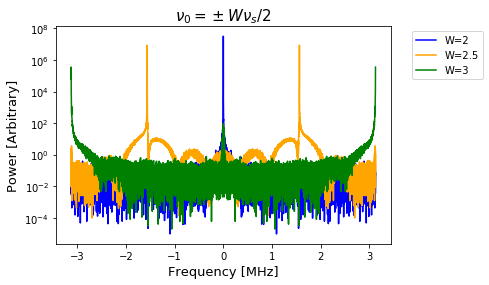

In [44]:
nyquist_window = [1, -2, 2]
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
colors = ["blue", "orange", "green"]
i = 0
for window in nyquist_window:
    data = windows[window][0][0][:]
    power_fft = calc_power_fft(data)
    plt.plot(freq, power_fft, label=labels[window], color=colors[i])
    i += 1
plt.yscale('log')
plt.ylabel("Power [Arbitrary]",fontsize=13)
plt.xlabel("Frequency [MHz]", fontsize=13)
plt.title('$\\nu_0 = \pm W \\nu_s/2$', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()
# difference in magnitude due to interference in measuring the data, ideally would be the same

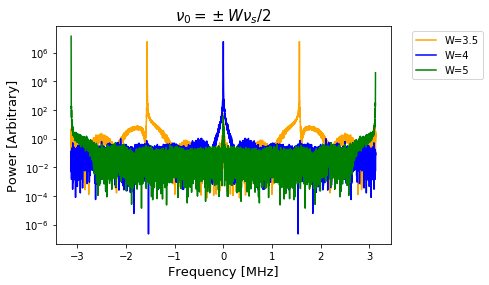

In [45]:
nyquist_window = [-1, 3, 4]
colors = ["orange", "blue", "green"]
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
i = 0
for window in nyquist_window:
    data = windows[window][0][0][:]
    power_fft = calc_power_fft(data)
    plt.plot(freq, power_fft, label=labels[window], color=colors[i])
    i += 1
plt.yscale('log')
plt.ylabel("Power [Arbitrary]",fontsize=13)
plt.xlabel("Frequency [MHz]", fontsize=13)
plt.title('$\\nu_0 = \pm W \\nu_s/2$', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

Text(-0.01, 0.5, 'Power [$V^2$]')

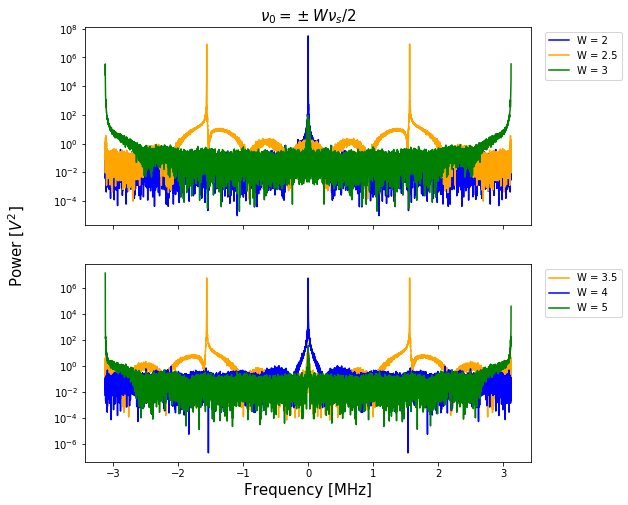

In [66]:
fig, ax = plt.subplots(2, 1, figsize=(8,8), sharex='col')

nyquist_window = [1, -2, 2]
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
colors = ["blue", "orange", "green"]
i = 0
for window in nyquist_window:
    data = windows[window][0][0][:]
    power_fft = calc_power_fft(data)
    ax[0].plot(freq, power_fft, label='W = ' + labels[window], color=colors[i])
    i += 1
ax[0].set_yscale('log')
ax[0].legend(bbox_to_anchor=(1.02, 1.0), loc='upper left')
ax[0].set_title('$\\nu_0 = \pm W \\nu_s/2$', fontsize=15)

nyquist_window = [-1, 3, 4]
colors = ["orange", "blue", "green"]
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
i = 0
for window in nyquist_window:
    data = windows[window][0][0][:]
    power_fft = calc_power_fft(data)
    ax[1].plot(freq, power_fft, label='W = ' + labels[window], color=colors[i])
    i += 1
ax[1].set_yscale('log')
ax[1].set_xlabel("Frequency [MHz]", fontsize=15)
ax[1].legend(bbox_to_anchor=(1.02, 1.0), loc='upper left')
fig.text(-0.01, 0.5, 'Power [$V^2$]', va='center', rotation='vertical', fontsize=15)


# Part 5.7 Fourier Transform of Noise

(1, 100, 16000)


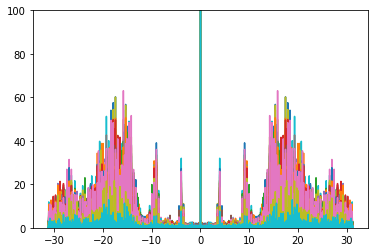

In [35]:
hundred_blocks = np.load("data/blocks_100.npy")
print(hundred_blocks.shape)
avg = np.zeros(16000)
for i in range(100):
    power_fft = calc_power_fft(hundred_blocks[0][i][:])
    plt.plot(freq, power_fft, label=str(i))
    avg += power_fft
# plt.yscale('log')
# plt.legend()
plt.ylim(0,100)
plt.show()

(0, 25)

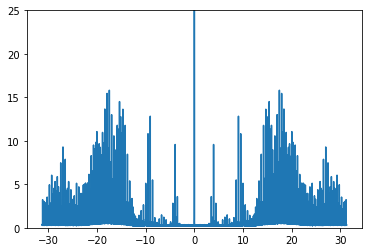

In [37]:
plt.plot(freq, avg/100)
plt.ylim(0, 25)

# Part 7

In [119]:
dual_minus = np.load("data/mixed_dual_minus.npy")
dual_minus_delay = np.load("data/mixed_dual_minus_delay.npy")
dual_plus = np.load("data/mixed_dual_plus.npy")
dual_plus_delay = np.load("data/mixed_dual_plus_delay.npy")
mixed_minus = np.load("data/mixed_minus.npy")
mixed_plus = np.load("data/mixed_plus.npy")
print(dual_minus.shape)

(2, 1, 16000)


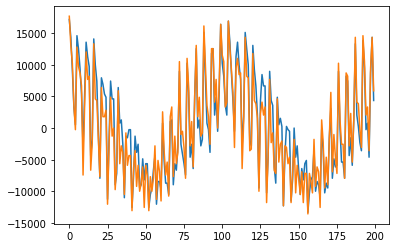

In [111]:
plt.plot(dual_minus[0][0][:200])
plt.plot(dual_minus[1][0][:200])


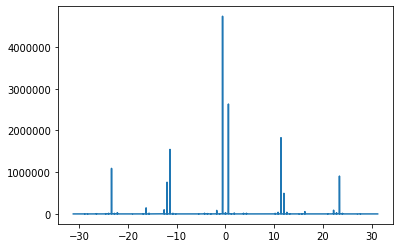

In [126]:
A = dual_minus[0][0]
B = dual_minus[1][0]
dual_minus_combined = A + 1j * B
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/62.5))
power_fft_combined = calc_power_fft(dual_minus_combined)
plt.plot(freq, power_fft_combined)

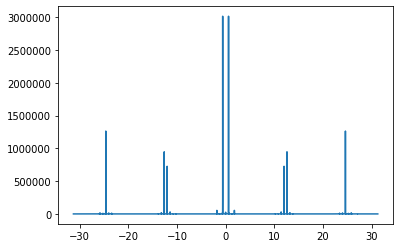

In [23]:
power_fft = calc_power_fft(mixed_plus[0][0])
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/62.5))
plt.plot(freq, power_fft)

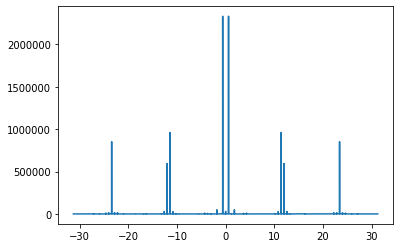

In [24]:
power_fft = calc_power_fft(mixed_minus[0][0])
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/62.5))
plt.plot(freq, power_fft)

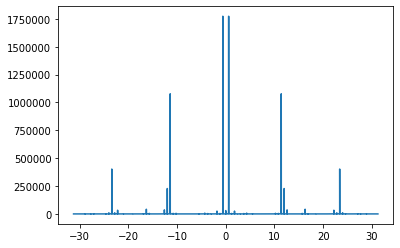

In [25]:
power_fft = calc_power_fft(dual_minus[0][0])
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/62.5))
plt.plot(freq, power_fft)

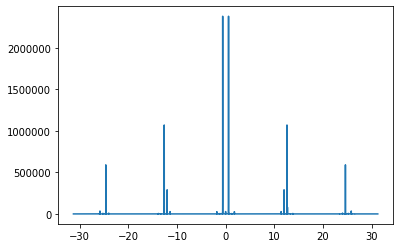

In [26]:
power_fft = calc_power_fft(dual_plus[0][0])
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/62.5))
plt.plot(freq, power_fft)

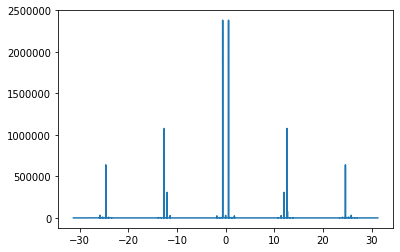

In [27]:
power_fft = calc_power_fft(dual_plus_delay[0][0])
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/62.5))
plt.plot(freq, power_fft)

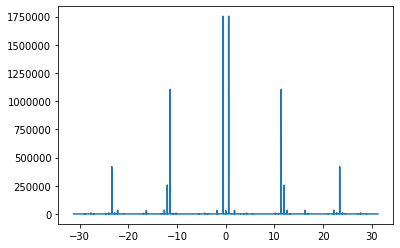

In [28]:
power_fft = calc_power_fft(dual_minus_delay[0][0])
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/62.5))
plt.plot(freq, power_fft)

In [ ]:
# need to do C = A + 1j * B before doing power spectra for A and B ports
# remove both sum and diff and the frequency itself (4 peaks)
# should be on one side of spectra